
### Use Pystan to estimate the item logits iteratively for each scene within a calibration process

In [24]:

import pystan
from IPython.display import clear_output

def analyze_data(item_logits, scores):
    """
    Performs Rasch analysis using pystan and updates item logits.

    Args:
        item_logits: Current item logits for each scene.
        scores: Scores for each participant on each scene (0 or 1).

    Returns:
        person_estimates: Estimated ability levels for each participant.
        updated_item_logits: Updated item logits for each scene.
    """

    # Define the Rasch model
    model_code = """
    data {
        int<lower=0> N;  // Number of participants
        int<lower=0> K;  // Number of items
        int<lower=0,upper=1> Y[N, K];  // Observed responses (0 or 1)
    }

    parameters {
        real theta[N];  // Person ability estimates
        real beta[K];  // Item difficulty estimates
    }

    model {
        for (i in 1:N) {
            for (j in 1:K) {
                Y[i, j] ~ bernoulli(exp(theta[i] - beta[j]));
            }
        }
    }
    """

    # Prepare data for Stan
    data = {'N': len(scores), 'K': len(item_logits), 'Y': scores}

    # Initialize Stan model
    sm = pystan.StanModel(model_code=model_code)
    clear_output(wait=True)

    # Fit the model with the current item logits
    try: fit = sm.sampling(data=data, init={'beta': item_logits}, iter=1000)
    except ValueError as e:
        print(str(e).strip())
        fit = sm.sampling(data=data, init='random', iter=1000)

    # Extract person estimates and updated item logits
    person_estimates = fit.extract()['theta']
    updated_item_logits = fit.extract()['beta']

    return person_estimates, updated_item_logits

In [27]:

import numpy as np

# Define convergence threshold
threshold = 0.001

# Initialize item logits and scores
item_logits = np.array([correct_stills_logodds, correct_walkers_logodds, correct_wave_logodds, correct_walk_logodds])
columns_list = ['is_stills_visited_first', 'is_walkers_visited_last', 'is_wave_command_issued', 'is_walk_command_issued']
assert len(item_logits) == len(columns_list), 'The item logits need to be the same count as the number of columns in scores'
scores = item_logits_df[columns_list].values

# Find the minimum and maximum values
min_value = np.min(item_logits)
max_value = np.max(item_logits)

# Normalize the values
item_logits = (item_logits - min_value) / (max_value - min_value)

# Define the number of iterations
iterations = 100

for _ in range(iterations):
    # Perform Rasch analysis using the current item logits
    # (This can be done using specialized software or libraries)
    person_estimates, updated_item_logits = analyze_data(item_logits, scores)

    # Check for convergence
    if max(abs(updated_item_logits - item_logits)) <= threshold:
        break

    # Update item logits for the next iteration
    item_logits = updated_item_logits

Invalid specification of initial values.
Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: bernoulli_lpmf: Probability parameter is 1.20642, but must be in the interval [0, 1]  (in 'unknown file name' at line 16)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: bernoulli_lpmf: Probability parameter is 4.85385, but must be in the interval [0, 1]  (in 'unknown file name' at line 16)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: bernoulli_lpmf: Probability parameter is 1.25271, but must be in the interval [0, 1]  (in 'unknown file name' at line 16)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: bernoulli_lpmf: Probability parameter is 21.2679, but must be in the interval [0, 1]  (in 'unknown file name' at line 16)

Rejecting initial value:
  Error evaluating the log probability at the initial 

RuntimeError: Initialization failed.

array([-1.00809828, -0.26372883,  1.36712445,  3.2162056 ])


## Determine how to access tasks in the VR logs

### Tools

In [4]:

import re

search_regex = re.compile('needle|decomp', re.IGNORECASE)
columns_list = [cn for cn in nu.get_regexed_columns(frvrs_logs_df, search_regex=search_regex) if not ('voice' in cn)]
print(columns_list)

['injury_record_required_procedure', 'tool_hover_type', 'tool_selected_type', 'injury_treated_required_procedure', 'tool_applied_type', 'tool_applied_tool_location', 'tool_applied_sender', 'tool_applied_attach_message', 'tool_discarded_type']


In [5]:

id_columns = [cn for cn in frvrs_logs_df.columns if cn.endswith('_id')]
nu.get_regexed_dataframe(frvrs_logs_df, columns_list, search_regex=search_regex)[columns_list+id_columns].dropna(axis='columns', how='all').sample(8).T

,353,1119,51,46,348,50,6,1275
injury_record_required_procedure,NaN,NaN,NaN,NaN,NaN,NaN,decompress,NaN
tool_hover_type,NaN,NaN,NaN,Needle,NaN,NaN,NaN,NaN
tool_selected_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injury_treated_required_procedure,NaN,NaN,NaN,NaN,NaN,decompress,NaN,NaN
tool_applied_type,Needle,Needle,Needle,NaN,NaN,NaN,NaN,Needle
tool_applied_tool_location,cath_needle (UnityEngine.GameObject),cath_needle (UnityEngine.GameObject),cath_needle (UnityEngine.GameObject),NaN,NaN,NaN,NaN,cath_needle (UnityEngine.GameObject)
tool_applied_sender,Needle_Decomp(Clone) (UnityEngine.GameObject),Needle_Decomp(Clone) (UnityEngine.GameObject),Needle_Decomp(Clone) (UnityEngine.GameObject),NaN,NaN,NaN,NaN,Needle_Decomp(Clone) (UnityEngine.GameObject)
tool_applied_attach_message,AppliedDecompNeedle,AppliedDecompNeedle,AppliedDecompNeedle,NaN,NaN,NaN,NaN,AppliedDecompNeedle
tool_discarded_type,NaN,NaN,NaN,NaN,Needle,NaN,NaN,NaN
injury_record_id,NaN,NaN,NaN,NaN,NaN,NaN,R Chest Collapse,NaN


In [ ]:

def get_treatment_value(self, patient_df, injury_id, verbose=False):
    """
    0=No Treatment or Wrong Treatment, 1=Correct Treatment
    """
    
    # Get required procedure
    mask_series = (patient_df.injury_id == injury_id) & ~patient_df.injury_record_required_procedure.isnull()
    df = patient_df[mask_series]
    if not df.shape[0]: return np.nan
    required_procedure = df.injury_record_required_procedure.squeeze()
    
    # Get first attempt
    mask_series = (patient_df.injury_id == injury_id) & ~patient_df.injury_treated_required_procedure.isnull()
    df = patient_df[mask_series]
    if not df.shape[0]: return 0
    first_procedure = df.sort_values(['action_tick']).injury_treated_required_procedure.tolist()[0]
    
    is_injury_treated = int(first_procedure == required_procedure)

    return is_injury_treated


### Tags

In [41]:

search_regex = re.compile('green', re.IGNORECASE)
columns_list = [cn for cn in nu.get_regexed_columns(frvrs_logs_df, search_regex=search_regex) if not ('voice' in cn)]
print(columns_list)

['tag_selected_type', 'tag_applied_type', 'tag_discarded_type']


In [51]:

df = nu.get_regexed_dataframe(frvrs_logs_df, columns_list, search_regex=search_regex)[columns_list+id_columns].dropna(axis='columns', how='all')
df.sample(min(8, df.shape[0])).T

,214,1150,217
tag_selected_type,green,NaN,NaN
tag_applied_type,NaN,NaN,green
tag_discarded_type,NaN,green,NaN
tag_applied_patient_id,NaN,NaN,Mike_0 Root
scene_id,0,1,0
patient_id,NaN,NaN,Mike_0 Root
location_id,NaN,"(-1.2, 0.6, 5.3)",NaN


In [ ]:

def get_tag_value(patient_df, verbose=False):
    """
    0=No Tag or Wrong Tag, 1=Correct Tag
    """
    is_tag_correct = fu.get_is_tag_correct(patient_df, verbose=verbose)
    if np.isnan(is_tag_correct): is_tag_correct = 0
    else: is_tag_correct = int(is_tag_correct)

    return is_tag_correct


### Pulse

In [63]:

search_regex = re.compile('pulse', re.IGNORECASE)
columns_list = [cn for cn in nu.get_regexed_columns(frvrs_logs_df, search_regex=search_regex) if not ('voice' in cn)]
print(columns_list)

['action_type', 'pulse_taken_pulse_name']


In [65]:

# columns_list = ['patient_demoted_pulse', 'patient_engaged_pulse', 'patient_record_pulse']
df = frvrs_logs_df[columns_list].drop_duplicates()
mask_series = ~df.pulse_taken_pulse_name.isnull()
df[mask_series]

,action_type,pulse_taken_pulse_name
43,PULSE_TAKEN,pulse_faint
62,PULSE_TAKEN,pulse_normal
145,PULSE_TAKEN,pulse_fast
321,PULSE_TAKEN,pulse_none


In [ ]:

def get_pulse_value(self, patient_df, verbose=False):
    """
    0=No Pulse Taken, 1=Pulse Taken
    """
    mask_series = (patient_df.action_type == 'PULSE_TAKEN')
    is_pulse_taken = int(patient_df[mask_series].shape[0] > 0)

    return is_pulse_taken


### Stills first

In [ ]:

def get_stills_value(scene_df, verbose=False):
    """
    0=All Stills not visited first, 1=All Stills visited first
    """
    actual_sequence, ideal_sequence, sort_dict = fu.get_actual_and_ideal_patient_sort_sequences(scene_df, verbose=verbose)

    # Truncate both sequences to the stills length and compare them
    still_len = len(sort_dict['still'])
    ideal_sequence = ideal_sequence.tolist()[:still_len]
    actual_sequence = actual_sequence.tolist()[:still_len]
    is_stills_visited_first = int(actual_sequence == ideal_sequence)

    return is_stills_visited_first


### Walkers last

In [ ]:

def get_walkers_value(scene_df, verbose=False):
    """
    0=All Walkers not visited last, 1=All Walkers visited last
    """
    actual_sequence, ideal_sequence, sort_dict = fu.get_actual_and_ideal_patient_sort_sequences(scene_df, verbose=verbose)

    # Truncate both sequences to the walkers length and compare them
    walker_len = len(sort_dict['walker'])
    ideal_sequence = ideal_sequence.tolist()[-walker_len:]
    actual_sequence = actual_sequence.tolist()[-walker_len:]
    is_walkers_visited_last = int(actual_sequence == ideal_sequence)

    return is_walkers_visited_last


### Command to wave

In [70]:

search_regex = re.compile('wave', re.IGNORECASE)
columns_list = [cn for cn in nu.get_regexed_columns(frvrs_logs_df, search_regex=search_regex) if not ('voice' in cn)]
print(columns_list)

['action_type', 'patient_demoted_sort', 'patient_record_sort', 's_a_l_t_wave_if_can_sort_command_text', 's_a_l_t_waved_sort_command_text', 'patient_engaged_sort', 'patient_sort']


In [71]:

df = nu.get_regexed_dataframe(frvrs_logs_df, columns_list, search_regex=search_regex)[columns_list+id_columns].dropna(axis='columns', how='all')
df.sample(min(8, df.shape[0])).T

,33,0,34,59,32,234,11
action_type,S_A_L_T_WAVED,PATIENT_DEMOTED,S_A_L_T_WAVE_IF_CAN,PATIENT_ENGAGED,S_A_L_T_WAVE_IF_CAN,PATIENT_DEMOTED,PATIENT_RECORD
patient_demoted_sort,NaN,waver,NaN,NaN,NaN,waver,NaN
patient_record_sort,NaN,NaN,NaN,NaN,NaN,NaN,waver
s_a_l_t_wave_if_can_sort_command_text,NaN,NaN,waveIfCan,NaN,waveIfCan,NaN,NaN
s_a_l_t_waved_sort_command_text,waved,NaN,NaN,NaN,NaN,NaN,NaN
patient_engaged_sort,NaN,NaN,NaN,waver,NaN,NaN,NaN
patient_sort,NaN,waver,NaN,waver,NaN,waver,waver
patient_demoted_id,NaN,Mike_1 Root,NaN,NaN,NaN,Lily_2 Root,NaN
patient_record_id,NaN,NaN,NaN,NaN,NaN,NaN,Mike_1 Root
s_a_l_t_wave_if_can_patient_id,NaN,NaN,Mike_1 Root,NaN,Mike_0 Root,NaN,NaN


In [ ]:

def get_wave_value(scene_df, verbose=False):
    """
    0=No Wave Command issued, 1=Wave Command issued
    """
    mask_series = (scene_df.action_type == 'S_A_L_T_WAVE_IF_CAN')
    is_wave_command_issued = int(scene_df[mask_series].shape[0] > 0)

    return is_wave_command_issued


### Command to wave

In [72]:

search_regex = re.compile('walk', re.IGNORECASE)
columns_list = [cn for cn in nu.get_regexed_columns(frvrs_logs_df, search_regex=search_regex) if not ('voice' in cn)]
print(columns_list)

['action_type', 'patient_demoted_sort', 'patient_record_sort', 's_a_l_t_walk_if_can_sort_command_text', 's_a_l_t_walked_sort_command_text', 'patient_engaged_sort', 'patient_sort']


In [73]:

df = nu.get_regexed_dataframe(frvrs_logs_df, columns_list, search_regex=search_regex)[columns_list+id_columns].dropna(axis='columns', how='all')
df.sample(min(8, df.shape[0])).T

,19,9,13,1,23,140,20
action_type,S_A_L_T_WALKED,PATIENT_RECORD,PATIENT_RECORD,PATIENT_DEMOTED,S_A_L_T_WALKED,PATIENT_ENGAGED,S_A_L_T_WALK_IF_CAN
patient_demoted_sort,NaN,NaN,NaN,walker,NaN,NaN,NaN
patient_record_sort,NaN,walker,walker,NaN,NaN,NaN,NaN
s_a_l_t_walk_if_can_sort_command_text,NaN,NaN,NaN,NaN,NaN,NaN,walkIfCan
s_a_l_t_walked_sort_command_text,walked,NaN,NaN,NaN,walked,NaN,NaN
patient_engaged_sort,NaN,NaN,NaN,NaN,NaN,walker,NaN
patient_sort,NaN,walker,walker,walker,NaN,walker,NaN
patient_demoted_id,NaN,NaN,NaN,Mike_2 Root,NaN,NaN,NaN
patient_record_id,NaN,Mike_2 Root,Mike_0 Root,NaN,NaN,NaN,NaN
s_a_l_t_walk_if_can_patient_id,NaN,NaN,NaN,NaN,NaN,NaN,Mike_0 Root


In [ ]:

def get_walk_value(scene_df, verbose=False):
    """
    0=No Walk Command issued, 1=Walk Command issued
    """
    mask_series = (scene_df.action_type == 'S_A_L_T_WALK_IF_CAN')
    is_walk_command_issued = int(scene_df[mask_series].shape[0] > 0)

    return is_walk_command_issued


## Rasch Item Analysis Prelim Results

In [7]:

file_path = osp.abspath('../data/xlsx/Copy of Rasch Item Analysis Prelim Results.xlsx')
print([f'pd.{fn}' for fn in dir(pd) if 'excel' in fn.lower()])
item_analysis_df = pd.read_excel(file_path)
print(item_analysis_df.columns.tolist())
print(item_analysis_df.Values.unique().tolist())
display(item_analysis_df.sort_values('Item Logits/Item Difficulty', ascending=False))

['pd.ExcelFile', 'pd.ExcelWriter', 'pd.read_excel']
['Patient', 'Task', 'Variable Name', 'Values', 'Item Logits/Item Difficulty', 'Model Std Error']
['0=No Treatment or Wrong Treatment, 1=Treatment with Pressure Gauze Wrap', '0=No Treatment or Wrong Treatment, 1=Treatment with Tourniquet', '0=Wrong, 1=Correct', '0=No Treatment or Wrong Treatment, 1=Treatment with Wound Packing', nan, "0=Treat/Wrong, 1=Don't Treat/Correct", '0=No Treatment or Wrong Treatment, 1=Treatment with Needle Decompression']


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
0,Mike_7_Root,Treat_Shin_Laceration,TRT_7_CALF,"0=No Treatment or Wrong Treatment, 1=Treatment...",2.61,0.32
1,Mike_5_Root,Treat_Thigh_Laceration,TRT_5_THIGH,"0=No Treatment or Wrong Treatment, 1=Treatment...",2.51,0.31
2,Gloria_8_Root,Tag-Green,TAG_8_CORRECT,"0=Wrong, 1=Correct",1.70,0.27
3,Gloria_8_Root,Treat_Forearm_Laceration,TRT_8_FOREARM,"0=No Treatment or Wrong Treatment, 1=Treatment...",1.49,0.26
4,Lily_2_Root,Tag-Red,TAG_2_CORRECT,"0=Wrong, 1=Correct",1.21,0.26
5,Helga_10_Root,Take-Pulse,PULSE_HELGA_10,"0=Wrong, 1=Correct",1.08,0.26
6,Mike_7_Root,Take-Pulse,PULSE_MIKE_7,"0=Wrong, 1=Correct",0.87,0.26
7,Bob_9_Root,Take-Pulse,PULSE_BOB_9,"0=Wrong, 1=Correct",0.80,0.26
8,Mike_5_Root,Take-Pulse,PULSE_MIKE_5,"0=Wrong, 1=Correct",0.80,0.26
9,Gary_1_Root,Tag-Gray,TAG_1_CORRECT,"0=Wrong, 1=Correct",0.74,0.26


In [9]:

for value_pair, value_pair_df in item_analysis_df.groupby(['Values'], dropna=False):
    print(value_pair)
    display(value_pair_df)

0=No Treatment or Wrong Treatment, 1=Treatment with Needle Decompression


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
42,Gary_3_Root,Treat_Chest_Collapse,TRT_3_CHEST,"0=No Treatment or Wrong Treatment, 1=Treatment...",-4.47,1.82


0=No Treatment or Wrong Treatment, 1=Treatment with Pressure Gauze Wrap


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
0,Mike_7_Root,Treat_Shin_Laceration,TRT_7_CALF,"0=No Treatment or Wrong Treatment, 1=Treatment...",2.61,0.32
3,Gloria_8_Root,Treat_Forearm_Laceration,TRT_8_FOREARM,"0=No Treatment or Wrong Treatment, 1=Treatment...",1.49,0.26
23,Gloria_6_Root,Treat_Calf_Shrapnel,TRT_6_CALF,"0=No Treatment or Wrong Treatment, 1=Treatment...",-0.12,0.30


0=No Treatment or Wrong Treatment, 1=Treatment with Tourniquet


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
1,Mike_5_Root,Treat_Thigh_Laceration,TRT_5_THIGH,"0=No Treatment or Wrong Treatment, 1=Treatment...",2.51,0.31
17,Mike_7_Root,Treat_Thigh_Puncture,TRT_7_THIGH,"0=No Treatment or Wrong Treatment, 1=Treatment...",0.22,0.28
32,Lily_2_Root,Treat_Shin_Amputation,TRT_2_SHIN,"0=No Treatment or Wrong Treatment, 1=Treatment...",-1.82,0.53


0=No Treatment or Wrong Treatment, 1=Treatment with Wound Packing


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
11,Mike_5_Root,Treat_Stomach_Puncture,TRT_5_SIDE,"0=No Treatment or Wrong Treatment, 1=Treatment...",0.66,0.27
14,Lily_4_Root,Treat_Stomach_Puncture,TRT_4_SIDE,"0=No Treatment or Wrong Treatment, 1=Treatment...",0.52,0.27


0=Treat/Wrong, 1=Don't Treat/Correct


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
34,Gary_1_Root,Treat_Face_Shrapnel,TRT_1_FACE,"0=Treat/Wrong, 1=Don't Treat/Correct",-2.57,0.73
35,Helga_10_Root,Treat_Forehead_Scrape,TRT_10_FOREHEAD,"0=Treat/Wrong, 1=Don't Treat/Correct",-3.29,1.02
36,Bob_0_Root,Treat_Chest_Collapse,TRT_0_CHEST,"0=Treat/Wrong, 1=Don't Treat/Correct",-4.47,1.82
37,Bob_0_Root,Treat_Face_Shrapnel,TRT_0_FACE,"0=Treat/Wrong, 1=Don't Treat/Correct",-4.47,1.82
38,Bob_0_Root,Treat_Shin_Amputation,TRT_0_SHIN,"0=Treat/Wrong, 1=Don't Treat/Correct",-4.47,1.82
39,Bob_0_Root,Treat_Stomach_Puncture,TRT_0_STOMACH,"0=Treat/Wrong, 1=Don't Treat/Correct",-4.47,1.82
40,Bob_0_Root,Treat_Thigh_Laceration,TRT_0_THIGH,"0=Treat/Wrong, 1=Don't Treat/Correct",-4.47,1.82
41,Bob_0_Root,Treat_Wrist_Amputation,TRT_0_WRIST,"0=Treat/Wrong, 1=Don't Treat/Correct",-4.47,1.82
43,Gary_9_Root,Treat_Eardrum_Rupture,TRT_9_EARBLEED,"0=Treat/Wrong, 1=Don't Treat/Correct",-4.47,1.82


0=Wrong, 1=Correct


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
2,Gloria_8_Root,Tag-Green,TAG_8_CORRECT,"0=Wrong, 1=Correct",1.70,0.27
4,Lily_2_Root,Tag-Red,TAG_2_CORRECT,"0=Wrong, 1=Correct",1.21,0.26
5,Helga_10_Root,Take-Pulse,PULSE_HELGA_10,"0=Wrong, 1=Correct",1.08,0.26
6,Mike_7_Root,Take-Pulse,PULSE_MIKE_7,"0=Wrong, 1=Correct",0.87,0.26
7,Bob_9_Root,Take-Pulse,PULSE_BOB_9,"0=Wrong, 1=Correct",0.80,0.26
8,Mike_5_Root,Take-Pulse,PULSE_MIKE_5,"0=Wrong, 1=Correct",0.80,0.26
9,Gary_1_Root,Tag-Gray,TAG_1_CORRECT,"0=Wrong, 1=Correct",0.74,0.26
10,Gloria_8_Root,Take-Pulse,PULSE_GLORIA_8,"0=Wrong, 1=Correct",0.66,0.27
15,Gloria_6_Root,Take-Pulse,PULSE_GLORIA_6,"0=Wrong, 1=Correct",0.45,0.27
16,Bob_9_Root,Tag-Green,TAG_9_CORRECT,"0=Wrong, 1=Correct",0.22,0.28


nan


,Patient,Task,Variable Name,Values,Item Logits/Item Difficulty,Model Std Error
12,Scene_First_11,Visit_Still_Pt_First,STILL_FIRST,NaN,0.53,0.68
13,Scene_First_11,Visit_Walkers_Last,WALKERS_LAST,NaN,0.53,0.68
28,Scene_First_11,Issue-Wave Command,WAVE_COMMAND,NaN,-1.18,0.41
33,Scene_First_11,Issue-Walk Command,WALK_COMMAND,NaN,-2.13,0.60


In [76]:

confusing_tasks_list = []
for task in item_analysis_df.Task.unique():
    mask_series = (item_analysis_df.Task == task)
    comment_list = [str(v) for v in item_analysis_df[mask_series].Values.unique()]
    if len(comment_list) > 1: confusing_tasks_list.append(task)
print(
    f'For a number of these tasks ({nu.conjunctify_nouns(confusing_tasks_list)}),'
    ' the Rasch Item Analysis Prelim Results has different, contradictory, descriptions of what the values mean for different rows.'
)

For a number of these tasks (Treat_Thigh_Laceration, Treat_Stomach_Puncture, Treat_Shin_Amputation, and Treat_Chest_Collapse), the Rasch Item Analysis Prelim Results has different, contradictory, descriptions of what the values mean for different rows.



## Pystan

In [ ]:

import pystan

model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)

In [4]:

y = model.sampling().extract()['y']
y.mean()  # with luck the result will be near 0


Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!



Iteration:    1 / 2000 [  0%]  (Warmup)
Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 1.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)

Gradient evaluation took 2.2e-05 seconds
Iteration:  200 / 2000 [ 10%]  (Warmup)
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  400 / 2000 [ 20%

0.03866522457394183


# Rasch Analysis

In [ ]:

# Import the spelling data, create an `EdstanData` instance, and fit the Rasch model
from edstan_data import EdstanData

spelling = pd.read_csv('../data/csv/spelling.csv')
words = ['infidelity', 'panoramic', 'succumb', 'girder']
ed_1 = EdstanData(response_matrix = spelling[words])
ed_1.fit_model('rasch', iter=200, chains=4)

In [1]:

# https://colab.research.google.com/drive/1dBcpXxHuc9YXv9yGllxlahx585hEmdbn?usp=sharing#scrollTo=2hlI6NEV_kgV

In [2]:

# This function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank

# Simulation package contains the Simulator and all abstract classes
# from catsim.simulation import *

# Initialization package contains different initial proficiency estimation strategies
# from catsim.initialization import *

# Selection package contains different item selection strategies
# from catsim.selection import *

# Estimation package contains different proficiency estimation methods
# from catsim.estimation import *

# Stopping package contains different stopping criteria for the CAT
# from catsim.stopping import *

import catsim.plot as catplot

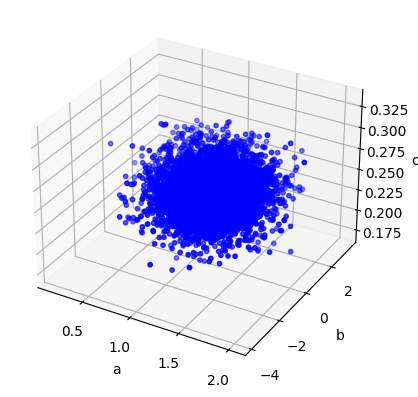

In [4]:

bank_size = 5000
items = generate_item_bank(bank_size, itemtype='3PL')
catplot.gen3d_dataset_scatter(items)

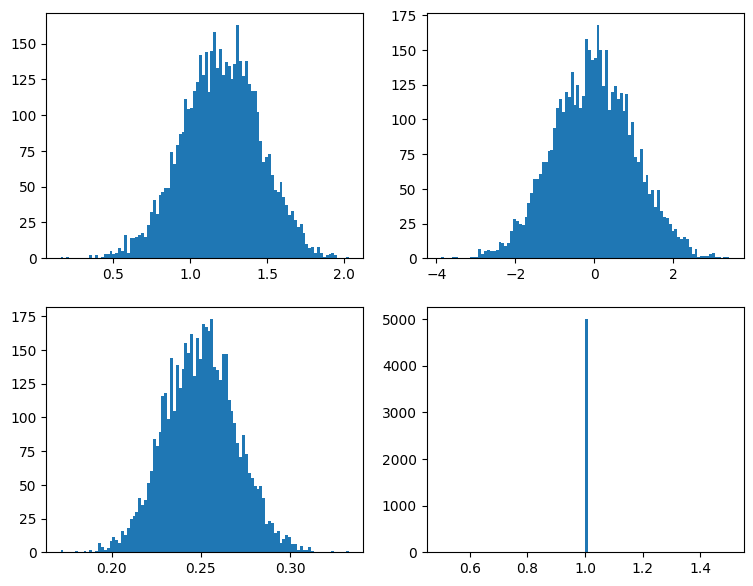

In [5]:

catplot.param_dist(items, figsize=(9, 7))

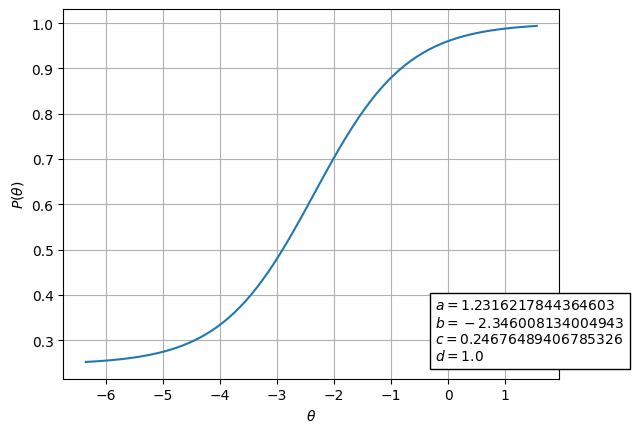

In [6]:

a, b, c, d = items[0]
catplot.item_curve(a,b,c,d)